In [1]:
from faker import Faker 
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
fake = Faker()

In [3]:
np.random.seed(42)

In [4]:
num_customers = 950

In [5]:
#Generating synthetic data
data = {
    'customer_id': [fake.uuid4() for _ in range(num_customers)],
    'age': np.random.randint(18, 70, size=num_customers),
    'gender': np.random.choice(['Male', 'Female'], size=num_customers),
    'signup_date': [fake.date_between(start_date='-2y', end_date='today') for _ in range(num_customers)],
    'last_purchase_days_ago': np.random.randint(0, 365, size=num_customers),
    'total_purchases': np.random.poisson(lam=10, size=num_customers),
    'average_order_value': np.random.normal(50, 15, size=num_customers).round(2),
    'browsing_time_minutes': np.random.exponential(scale=10, size=num_customers).round(2),
    'churned': np.random.choice([0, 1], size=num_customers, p=[0.8, 0.2])  # 1 = churned
}

In [6]:
df = pd.DataFrame(data)
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['total_spent'] = df['total_purchases'] * df['average_order_value']


In [7]:
df.head()

,customer_id,age,gender,signup_date,last_purchase_days_ago,total_purchases,average_order_value,browsing_time_minutes,churned,total_spent
0,7aa31b7c-989c-4721-b575-dce7dad83193,56,Male,2023-12-19,60,12,41.46,5.05,0,497.52
1,a6874193-8154-4e90-8bad-e1c85f2eff01,69,Female,2023-12-31,197,11,38.51,5.64,0,423.61
2,d5ede42e-8408-45dc-bd7d-0c4aed69844e,46,Female,2024-11-04,294,7,35.05,8.42,0,245.35
3,e4f295b0-6493-4977-958c-52a72b20054a,32,Female,2025-05-19,318,8,50.97,0.02,0,407.76
4,8352548e-7823-4fea-994d-a8a9172f75eb,60,Female,2024-09-05,301,10,43.97,3.02,0,439.70


In [8]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check basic info
df.describe()

customer_id               0
age                       0
gender                    0
signup_date               0
last_purchase_days_ago    0
total_purchases           0
average_order_value       0
browsing_time_minutes     0
churned                   0
total_spent               0
dtype: int64


,age,signup_date,last_purchase_days_ago,total_purchases,average_order_value,browsing_time_minutes,churned,total_spent
count,950.000000,950,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,43.668421,2024-06-22 10:15:24.631578880,181.809474,10.086316,49.340400,9.988274,0.194737,498.478189
min,18.000000,2023-06-29 00:00:00,0.000000,1.000000,-0.090000,0.010000,0.000000,-0.450000
25%,31.000000,2023-12-21 06:00:00,89.000000,8.000000,38.805000,2.700000,0.000000,338.385000
50%,44.000000,2024-06-23 12:00:00,175.500000,10.000000,49.440000,6.805000,0.000000,476.940000
75%,56.000000,2024-12-15 00:00:00,277.750000,12.000000,59.965000,13.182500,0.000000,634.125000
max,69.000000,2025-06-26 00:00:00,364.000000,20.000000,93.810000,88.000000,1.000000,1442.720000
std,14.974955,NaN,106.912265,3.041844,14.907734,10.573625,0.396207,216.515398


In [ ]:
sns.histplot(df['age'], bins=20)
plt.title('Customer Age Distribution')
plt.show()

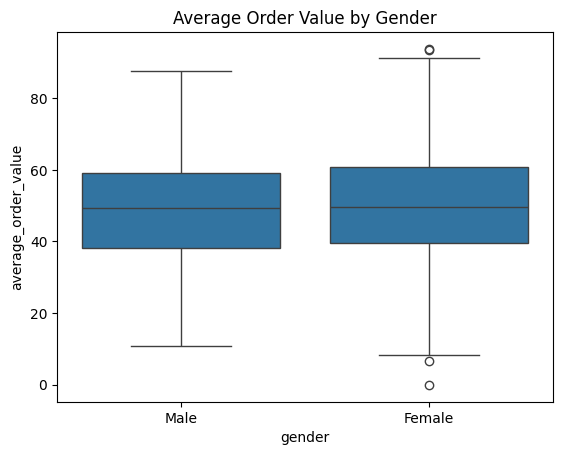

In [ ]:
sns.boxplot(data=df, x='gender', y='average_order_value')
plt.title('Average Order Value by Gender')
plt.show()

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

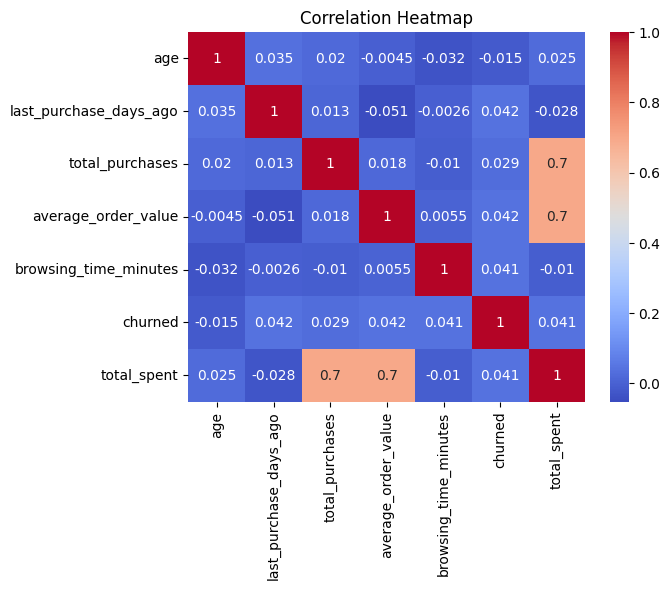

In [ ]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Encode gender
df['gender_encoded'] = df['gender'].map({'Male': 0, 'Female': 1})


In [ ]:
# Days since signup
df['days_since_signup'] = (pd.Timestamp.now() - df['signup_date']).dt.days

In [ ]:
# Select features for modeling
features = ['age', 'gender_encoded', 'last_purchase_days_ago', 'total_purchases',
            'average_order_value', 'browsing_time_minutes', 'days_since_signup', 'total_spent']

X = df[features]
#Target
y = df['churned']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_predict = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[147   1]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       148
           1       0.00      0.00      0.00        42

    accuracy                           0.77       190
   macro avg       0.39      0.50      0.44       190
weighted avg       0.61      0.77      0.68       190



In [ ]:
# Top churn factors
importances = model.feature_importances_
feature_names = features
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)


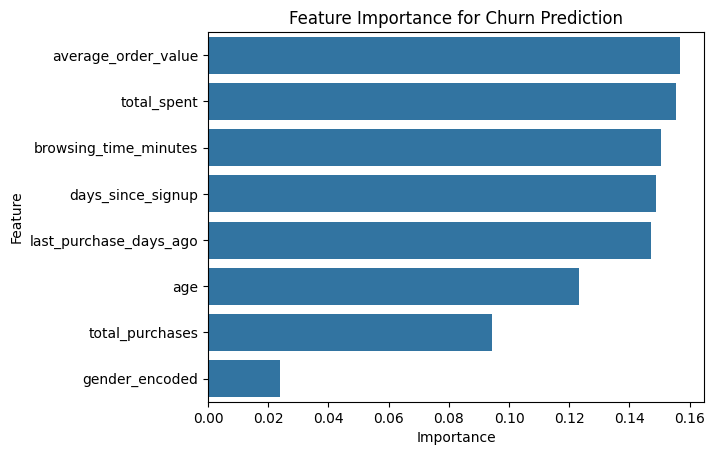

In [ ]:
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Feature Importance for Churn Prediction')
plt.show()
